# CS2103 / Lab-01 - Assignment 02 - `28-07-2025`

**Topic**: Decision Trees

**Instructions**: Complete all the tasks below. Submit your code as a notebook file named `A02.ipynb`

---


## Problem:

[a] Use the Iris dataset from `scikit-learn` and inspect its structure. Print out some rows in the dataset to show the available features.

[b] Split the data into train and test sets. Then train a decision tree using the entropy criterion.

[c] Visualize the decision tree with `matplotlib`.

[d] Evaluate you decision tree model. Output the performace matrices - Precision, Recall and F1-score.

*Hint: use the `sklearn` library*

```python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
```



In [ ]:
# write your code here

## Solution:

---

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [61]:
df = load_iris(as_frame=True)

df.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

### Seperating the Data features and target labels

In [28]:
X, y = df['data'], df['target']

In [60]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Splitting the Data into Train Test Split (33% test)

In [36]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)


In [37]:
clf = DecisionTreeClassifier(random_state=42, criterion='entropy')

### Fitting the model with training Data

In [40]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Visulaizing the Tree

In [43]:
import matplotlib.pyplot as plt
from sklearn import tree

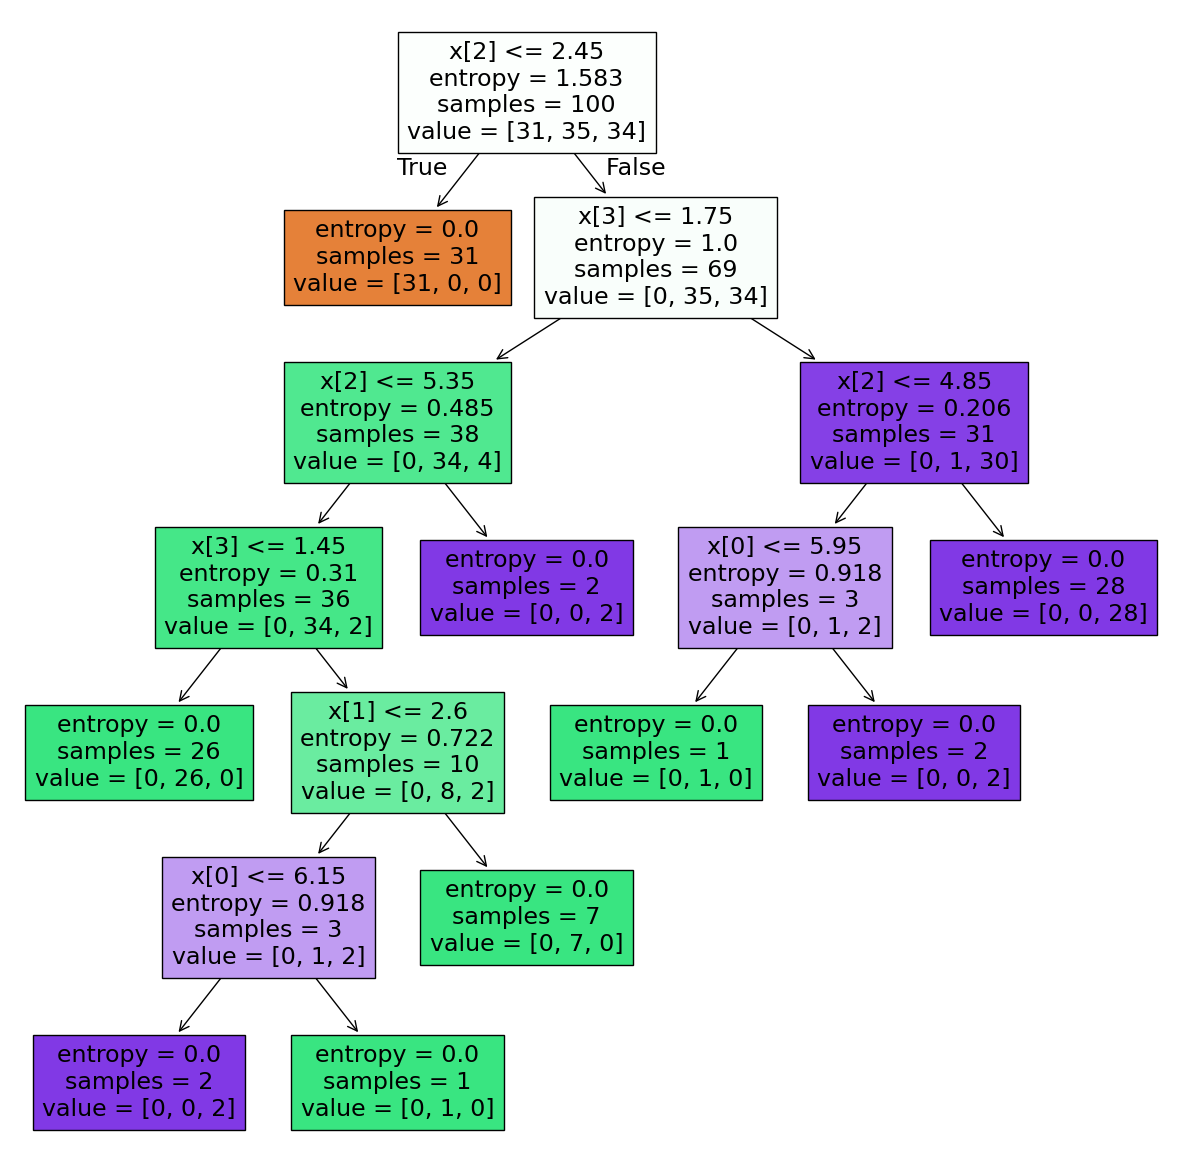

In [59]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf, filled=True)
plt.show()

### Predicting the Test Data and Evaluating

In [49]:
y_pred = clf.predict(X_test)

In [53]:
report = classification_report(y_pred, y_test, target_names=df.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### Confusion Matrix for the Classification

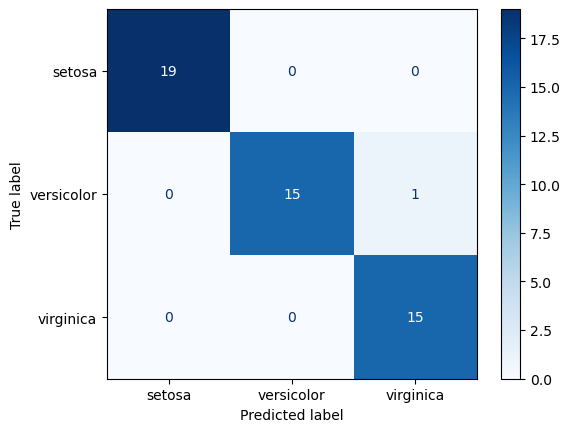

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=df.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()